In [1]:
# %%
import os
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro, monte_carlo_test
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from stats_test import shapiro_test
path = os.path.join(os.getcwd(), 'datasets','Birthweight.csv')
dataset = pd.read_csv(path, sep=',', decimal='.')

dataset.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [2]:
dataset['ID'] = dataset['ID'].astype(object)

In [3]:
dataset.describe()

,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
min,43.000000,1.920000,30.000000,33.000000,0.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000
25%,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
50%,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
max,58.000000,4.570000,39.000000,45.000000,1.000000,41.000000,50.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000


In [4]:
'''
Q1. What is the mean father’s age?
'''
fathers = dataset['fage']
mean = fathers.mean()

print(f"Mean is {mean:.3f} years")

Mean is 28.905 years


In [5]:
'''
Q2. What is the mean father’s age for low birthweight babies?
'''
m = dataset[dataset['lowbwt']==1]['fage'].mean()

print(f"Mean is {m:.3f} years")


Mean is 24.833 years


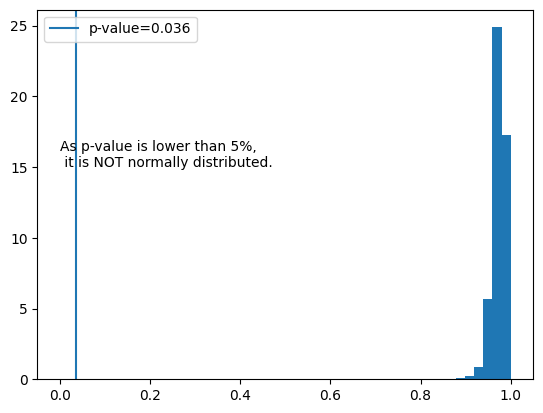

In [6]:
'''
Q3. Is the father's age normally distributed? Justify your answer.
'''
shapiro_test(dataset['fage'])


In [7]:
'''
Q4. If you apply the log transformation to the father's age, what is the mean score of the transformed variable?
'''
log_strans = np.log(dataset['fage'])
log_strans.mean()


np.float64(3.3370421189026085)

In [8]:
'''
Q5. Is the above mean score a good representation of the real value? Justify your answer.
'''
print('''The mean score of the log-transformed variable (3.33) is not a direct 
      representation of the real value in the original scale. However, 
      it provides valuable information about the distribution and central tendency of the data after transformation.''')

The mean score of the log-transformed variable (3.33) is not a direct 
      representation of the real value in the original scale. However, 
      it provides valuable information about the distribution and central tendency of the data after transformation.


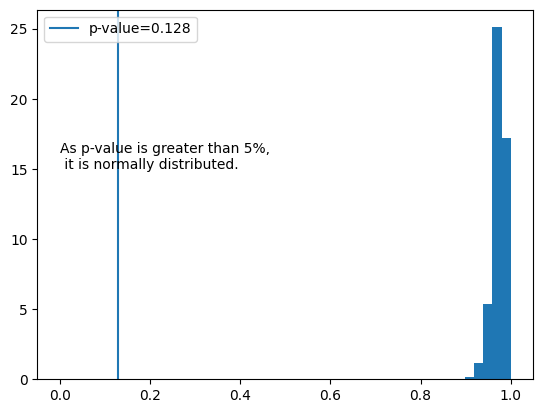

In [9]:
'''
Q6. Is the new variable (log transform of father’s age) normally distributed? Justify your answer.
'''
shapiro_test(np.log(dataset['fage']))

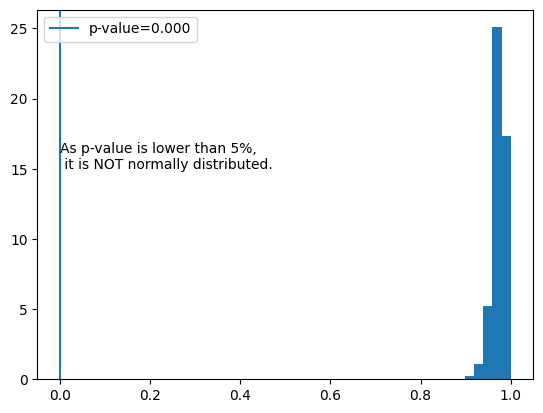

In [10]:
'''
Q7. Is the variable “years father was in education” normally distributed? 
'''
shapiro_test(dataset['fedyrs'])

In [11]:
'''
Q8. Mentioning the null and alternative hypotheses, explain the above answer. 
'''
print('''The Shapiro-Wilk test tests the null hypothesis that the data are drawn from a normal distribution. 
Therefore, with a p-value below 0.05, we reject the null hypothesis and conclude that the data are not normally distributed.''')

The Shapiro-Wilk test tests the null hypothesis that the data are drawn from a normal distribution. 
Therefore, with a p-value below 0.05, we reject the null hypothesis and conclude that the data are not normally distributed.


In [12]:
'''
Q9. What is the mean score for the variable “years father was in education” after you apply the Box-Cox transformation?
'''
log_trans = np.log(dataset['fedyrs'])
log_trans.mean()

np.float64(2.6019771075049722)

<Axes: xlabel='log_fedyrs', ylabel='Count'>

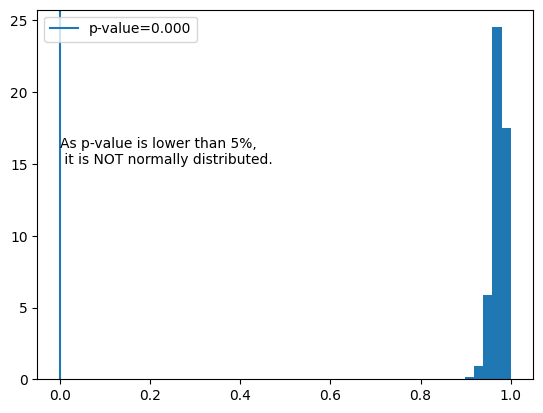

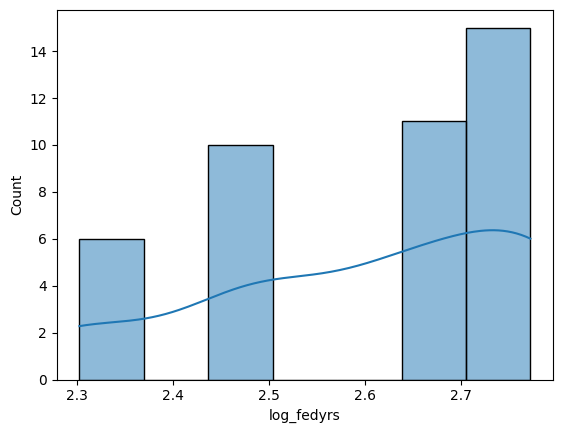

In [13]:
'''
Q10. Is this new variable normally distributed? Explain.
'''

shapiro_test(np.log(dataset['fedyrs']))
dataset['log_fedyrs'] = np.log(dataset['fedyrs'])

fig, ax = plt.subplots()
sns.histplot(dataset, x='log_fedyrs', ax=ax, kde=True)



In [14]:
'''
Q11. What is the mean score for this new variable (B-C transformed fathers’ years in education) for mothers aged under 35?
'''
m = dataset[dataset['mage35']==0]['log_fedyrs']
print(f'The mean is {m.mean():.3f}')

The mean is 2.588


I would use spearman Correlation.
0.17810631240688332
0.17570999332980183


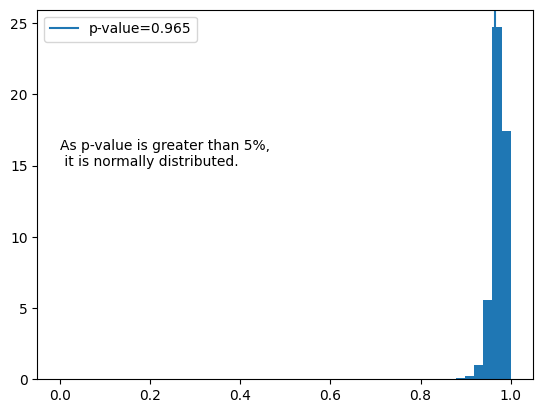

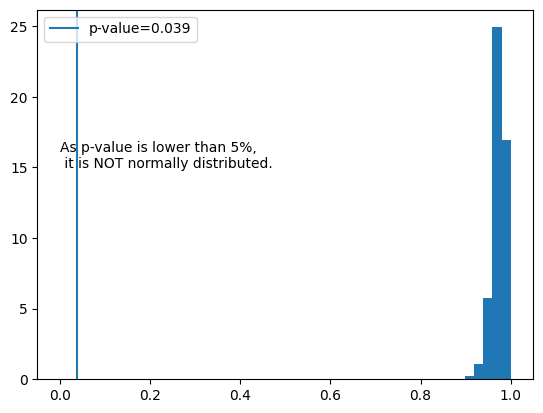

In [15]:
'''
Q12. Which test would you use to investigate the relationship between birth weight and father's age?
'''
shapiro_test(dataset['Birthweight'])
shapiro_test(dataset['fage'])

print("I would use spearman Correlation.")

res = stats.spearmanr(dataset['Birthweight'], dataset['fage'])
print(res.statistic)

res = stats.pearsonr(dataset['Birthweight'], dataset['fage'])
print(res.statistic)

In [16]:
'''
Q13. Justify the above choice in terms of the distribution of data and the nature of the test.
'''

print('''
As the data is ordinal but non-normal, it is not possible to use Pearson correlation. Hence, we should stick to the Spearman method.
''')



As the data is ordinal but non-normal, it is not possible to use Pearson correlation. Hence, we should stick to the Spearman method.



The relation is positive (a weak 0.17810631240688335), but not statiscally significant, as the p-value is greater tha 5%.


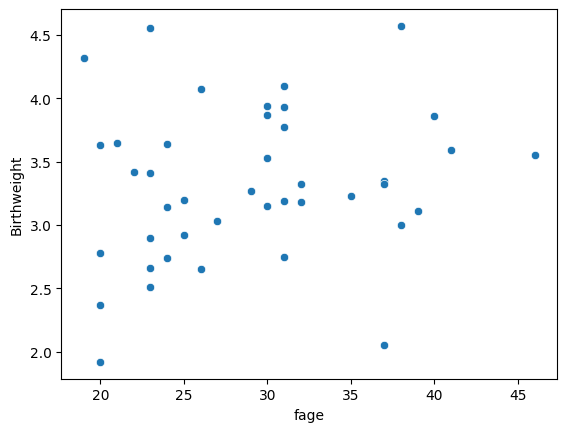

In [17]:
'''
Q14. What is the direction of that relationship?
Q15. What is the form of that relationship?
Q16. What is the degree of that relationship? 
'''
sns.scatterplot(x=dataset['fage'], y=dataset['Birthweight'])
res = stats.spearmanr(dataset['fage'],dataset['Birthweight'])

print(f"The relation is positive (a weak {res.statistic}), but not statiscally significant, as the p-value is greater tha 5%.")


In [18]:
'''
Q17. What test would you use to investigate the relationship between smoking and birth weight?
'''
print("I would use point-biserial correlation.")

I would use point-biserial correlation.



The results indicate a negative correlation (-0.31), which is statistically significant (p-value = 0.04). 
This result is similar to using Pearson correlation on a dummy-coded smoker variable.





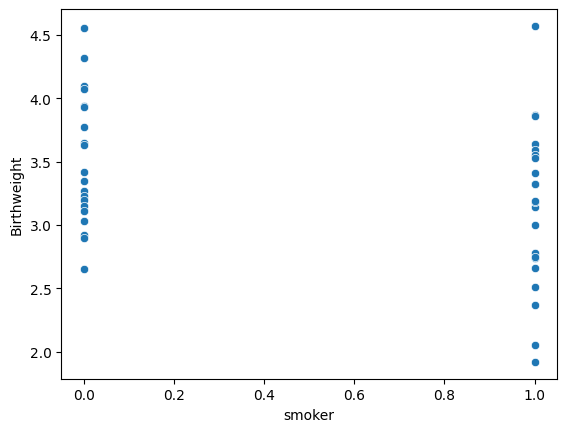

In [19]:
'''
Q18. Report on the above results including information about direction/form/degree of the relationship.
'''
X = dataset['smoker']
Y = dataset['Birthweight']
res = stats.pointbiserialr(X,Y)

sns.scatterplot(x=X, y=Y)

print(f'''
The results indicate a negative correlation ({res.statistic:.2f}), which is statistically significant (p-value = {res.pvalue:.2f}). 
This result is similar to using Pearson correlation on a dummy-coded smoker variable.
''')

dataset['smoker_dumm'] = pd.get_dummies(dataset['smoker'], drop_first=True)
X_pearson = dataset['smoker_dumm'] 
stats.pearsonr(X_pearson, Y)

print('''
''')

In [20]:
'''
Q19. If you wanted to see the effect of the length of a baby on birthweight, what would your independent variable be?
'''

print("Length of the baby!")

Length of the baby!


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Birthweight   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     44.80
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           5.03e-08
Time:                        14:31:12   Log-Likelihood:                -22.127
No. Observations:                  42   AIC:                             48.25
Df Residuals:                      40   BIC:                             51.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3624      1.149     -3.798      0.000      -6.684      -2.041
Length         0.1495      0.022      6.693      0.000       0.104       0.195
==============================================================================
Omnibus:                        0.686   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.746
Skew:                          -0.126   Prob(JB):                        0.689
Kurtosis:                       2.398   Cond. No.                         912.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

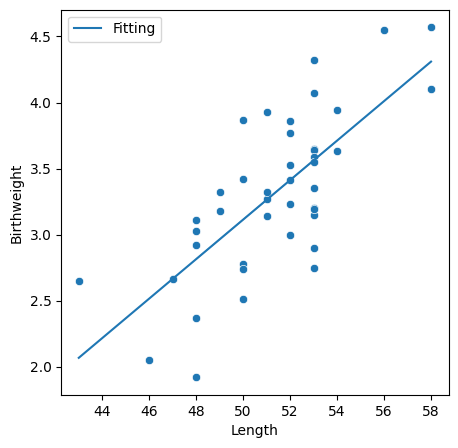

In [21]:
'''
Q20. In statistics, when creating a scatterplot, it is a common practice to put the independent variable on the x-axis and the dependent variable on the y-axis.
 With this in mind, create a scatterplot for the above case and provide the regression line. For homework submitted using MS Word, insert a picture of the scatterplot.
'''
fig,ax = plt.subplots(figsize=(5,5))

model = sm.formula.ols('Birthweight ~ Length', data=dataset)
results = model.fit()
dataset['fittedvalues'] = results.fittedvalues
dataset['error'] = results.fittedvalues - dataset['Birthweight']

sns.scatterplot(data=dataset, x="Length", y="Birthweight", ax=ax)
sns.lineplot(data=dataset, x="Length", y="fittedvalues", label='Fitting', ax=ax)
results.summary()

In [22]:
'''
Q21. Is the relationship between the length of baby and birthweight linear?
'''
print("Yes.")

Yes.


The linear regression returned a beta that is statistically significant, and the resids are normally distributed.


Text(0.5, 1.0, 'Shapiro test on resids.')

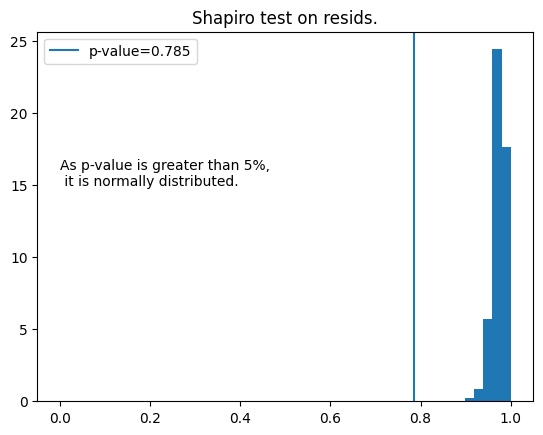

In [23]:
'''
Q22. Justify the above choice.
'''
print("The linear regression returned a beta that is statistically significant, and the resids are normally distributed.")
shapiro_test(dataset['error'])
plt.title('Shapiro test on resids.')

Based on the correlation matrix, there is.


,Birthweight,Headcirc,Length
Birthweight,1.000000,0.684616,0.726833
Headcirc,0.684616,1.000000,0.563172
Length,0.726833,0.563172,1.000000


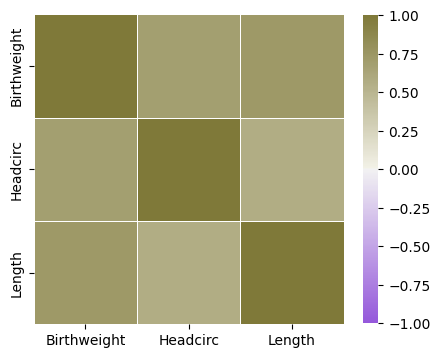

In [56]:
'''
Q23 . Is there any evidence to suggest that the birth weight, length of baby, and head circumference are related?
Q24. Justify the above choice.
'''


print("Based on the correlation matrix, there is.")
df = dataset[["Birthweight", "Headcirc", "Length"]]
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1000, -1000, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

corr

In [57]:
'''
Q25. Describe the above relationship in your own words and provide evidence for your claims.
'''

print('''
The relation between head circumference and length of baby is pretty spected, once the human body tends to respect some proportions. 
The correlations of Headcirc/Birthweight and Length/Birthweight maybe are also explained by the same aspects.
''')


The relation between head circumference and length of baby is pretty spected, once the human body tends to respect some proportions. 
The correlations of Headcirc/Birthweight and Length/Birthweight maybe are also explained by the same aspects.

